# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [3]:
env = UnityEnvironment(file_name="../banana_unity_env/Banana.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 0.0


When finished, you can close the environment.

In [6]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

## Model

The model will be a simple feed-forward neural network, with 3 fully connected layers each connected to a ReLU activation function, all of them have 64 hidden units.

I have tested with a few variations for the network without changing the hyperparameterrs. With and without dropout, more layers, one with a 512 units in the middle, and varying width. None of these changes seem to have a positive effect on the training. They either performed similarly, or worse than the simple one.

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class QNetwork(nn.Module):
    """Actor (Policy) Model."""

    def __init__(self, state_size, action_size, seed):
        """Initialize parameters and build model.
        Params
        ======
            state_size (int): Dimension of each state
            action_size (int): Dimension of each action
            seed (int): Random seed
        """
        super(QNetwork, self).__init__()
        self.seed = torch.manual_seed(seed)
        self.fc1 = nn.Linear(state_size, 64)
        self.ac1 = nn.ReLU()
        self.fc2 = nn.Linear(64, 64)
        self.ac2 = nn.ReLU()
        self.fc3 = nn.Linear(64, action_size)

    def preprocess_input(self, state):
        return state

    def forward(self, state):
        """Build a network that maps state -> action values."""
        # perform the forward pass
        # x = self.preprocess_input(state)
        x = self.ac1(self.fc1(state))
        x = self.ac2(self.fc2(x))
        x = self.fc3(x)
        return x

## Agent

This part will present a vanilla version of the DQN algorithm, only with Experience Replay Buffer and Target Network. The next part will show the impact of adding the improvements presented in class.

In [2]:
import numpy as np
import random
from collections import namedtuple, deque
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
import torch.optim as optim


class Agent():
    """Interacts with and learns from the environment."""

    def __init__(self, 
                 state_size, 
                 action_size,
                 t_step=0,
                 alpha=0.1,
                 model_path=None,
                 buffer_size=int(1e5),
                 batch_size=64,
                 gamma=0.99,
                 tau=1e-3,
                 learning_rate=5e-4,
                 update_every=4,
                 seed=0):
        """Initialize an Agent object.
        
        Params
        ======
            state_size (int): dimension of each state
            action_size (int): dimension of each action
            seed (int): random seed
        """
        self.state_size = state_size
        self.action_size = action_size
        self.seed = random.seed(seed)
        
        self.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

        # Q-Network
        if not model_path:
            print(f"Creating new models for local and target networks.")
            self.qnetwork_local = QNetwork(state_size, action_size, seed).to(self.device)
            self.qnetwork_target = QNetwork(state_size, action_size, seed).to(self.device)
            self.optimizer = optim.Adam(self.qnetwork_local.parameters(), lr=learning_rate)
            self.training = True
        else:
            print(f"Loading model from file {model_path}")
            self.qnetwork_local = QNetwork(state_size, action_size, seed).to(self.device)
            self.qnetwork_target = QNetwork(state_size, action_size, seed).to(self.device)
            self.qnetwork_local.load_state_dict(torch.load(model_path))
            self.qnetwork_target.load_state_dict(torch.load(model_path))
            self.training = False
        
        # Replay memory
        self.memory = ReplayBuffer(action_size, buffer_size, batch_size, seed, self.device)
        
        # Initialize time step (for updating every UPDATE_EVERY steps)
        self.t_step = t_step
        self.alpha = alpha
        self.buffer_size = buffer_size
        self.batch_size = batch_size
        self.gamma = gamma
        self.tau = tau
        self.learning_rate = learning_rate
        self.update_every = update_every
        

    def learn(self, experiences, gamma):
        """Update value parameters using given batch of experience tuples.

        Params
        ======
            experiences (Tuple[torch.Tensor]): tuple of (s, a, r, s', done) tuples 
            gamma (float): discount factor
        """
        states, actions, rewards, next_states, dones = experiences

        # Compute target values: # reward + gamma * max(Q(s', a')) * (1-done)
        td_targets_next_states = self.qnetwork_target(next_states).detach().max(1)[0].unsqueeze(1)
        td_targets = rewards + (gamma*td_targets_next_states * (1-dones))
#         print(f"td_targets_next_states: {td_targets_next_states.shape}. Should be {rewards.shape[0]}")
        
        # Current Q values
        q_values_local = self.qnetwork_local(states).gather(1, actions) # Q
        
        # compute loss (target - Q)**2
        loss = F.mse_loss(q_values_local, td_targets)
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        # ------------------- update target network ------------------- # # Only update the target network after we pass on the samples
        self.soft_update(self.qnetwork_local, self.qnetwork_target, self.tau)                     


    def soft_update(self, local_model, target_model, tau):
        """Soft update model parameters.
        θ_target = τ*θ_local + (1 - τ)*θ_target

        Params
        ======
            local_model (PyTorch model): weights will be copied from
            target_model (PyTorch model): weights will be copied to
            tau (float): interpolation parameter 
        """
        for target_param, local_param in zip(target_model.parameters(), local_model.parameters()):
            target_param.data.copy_(tau*local_param.data + (1.0-tau)*target_param.data)
            
            
    def step(self, state, action, reward, next_state, done):
        # Save experience in replay memory
        self.memory.add(state, action, reward, next_state, done)
        
        # Learn every UPDATE_EVERY time steps.
        self.t_step = (self.t_step + 1) % self.update_every
        if self.t_step == 0:
            # If enough samples are available in memory, get random subset and learn
            if len(self.memory) > self.batch_size:
                experiences = self.memory.sample()
                self.learn(experiences, self.gamma)

                
    def act(self, state, eps=0.):
        """Returns actions for given state as per current policy.
        
        Params
        ======
            state (array_like): current state
            eps (float): epsilon, for epsilon-greedy action selection
        """
        state = torch.from_numpy(state).float().unsqueeze(0).to(self.device)
        self.qnetwork_local.eval()
        with torch.no_grad():
            action_values = self.qnetwork_local(state)
            
        if self.training:
            self.qnetwork_local.train()
        
        # Epsilon-greedy action selection
        if random.random() > eps:
            return np.argmax(action_values.cpu().data.numpy())
        else:
            return random.choice(np.arange(self.action_size))


class ReplayBuffer: 
    """Fixed-size buffer to store experience tuples."""

    def __init__(self, action_size, buffer_size, batch_size, seed, device):
        """Initialize a ReplayBuffer object.

        Params
        ======
            action_size (int): dimension of each action
            buffer_size (int): maximum size of buffer
            batch_size (int): size of each training batch
            seed (int): random seed
        """
        self.device = device
        self.action_size = action_size
        self.memory = deque(maxlen=buffer_size)  
        self.batch_size = batch_size
        self.experience = namedtuple("Experience", field_names=["state", "action", "reward", "next_state", "done"])
        self.seed = random.seed(seed)
    
    def add(self, state, action, reward, next_state, done):
        """Add a new experience to memory."""
        e = self.experience(state, action, reward, next_state, done)
        self.memory.append(e)
    
    def sample(self):
        """Randomly sample a batch of experiences from memory."""
        experiences = random.sample(self.memory, k=self.batch_size)

        states = torch.from_numpy(np.vstack([e.state for e in experiences if e is not None])).float().to(self.device)
        actions = torch.from_numpy(np.vstack([e.action for e in experiences if e is not None])).long().to(self.device)
        rewards = torch.from_numpy(np.vstack([e.reward for e in experiences if e is not None])).float().to(self.device)
        next_states = torch.from_numpy(np.vstack([e.next_state for e in experiences if e is not None])).float().to(self.device)
        dones = torch.from_numpy(np.vstack([e.done for e in experiences if e is not None]).astype(np.uint8)).float().to(self.device)
  
        return (states, actions, rewards, next_states, dones)

    def __len__(self):
        """Return the current size of internal memory."""
        return len(self.memory)

    

## Training algorithm: Deep Q-Learning

This is a functinal implementation of the learning part of the Q-Learning algorithm, fit to match the unity environment's api. The algorithm is pretty simple, in which it receives the agent and the environment, along with some hyperparameters, and iterates over episodes and steps, at each step giving the agent the state, and asking it for the action to be taken.

In [5]:
import numpy as np
import time

def dqn(agent, env, brain_name, model_name="dqn_3fc_act_nodrop", n_episodes=2000, max_t=2000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """
    Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    timestr = time.strftime("%Y%m%d-%H%M%S")
    best = 0
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    episode_start = time.time()
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            env_info = env.step(action.astype(np.int32))[brain_name]
            next_state = env_info.vector_observations[0]
            reward = env_info.rewards[0]   
            done = env_info.local_done[0]
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)
        scores.append(score)
        eps = max(eps_end, eps_decay*eps)
        print('\rEpisode {}\tAverage Score: {:.2f}\tAverage steps per second:{}'.format(i_episode, np.mean(scores_window), t/(time.time()-episode_start)), end="")
        episode_start = time.time()
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=5.0 and np.mean(scores_window)>best:
            best = np.mean(scores_window)
#             print(f"\nOverwriting last checkpiont with current average score: {best}")
            filename = model_name + timestr + f"-score-{int(np.mean(scores_window))}" + ".pth"
            torch.save(agent.qnetwork_local.state_dict(), filename)
            
    return scores

## Train

### Instantiate the environment and the agent

In [4]:
from unityagents import UnityEnvironment
import numpy as np

env = UnityEnvironment(file_name="../banana_unity_env/Banana.exe")

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [7]:
t_step = 0
alpha = 0.1
gamma = 0.99
epsilon = 0.99
agent = Agent(state_size=37, 
              action_size=4,
              t_step=t_step,
              alpha=alpha,
              gamma=gamma,
              seed=0)

Creating new models for local and target networks.


### Run the Deep Q-Learning Algorithm

## The best result so far

With a vanilla DQN, the best result I could get with the fixed set of hyperparameters, was with the simple network. It achieved an average score of 17.16 bananas per episode.

Episode 100	Average Score: 0.78
Episode 200	Average Score: 4.27
Episode 300	Average Score: 6.86
Episode 400	Average Score: 10.49
Episode 500	Average Score: 13.23
Episode 600	Average Score: 13.57
Episode 700	Average Score: 14.30
Episode 739	Average Score: 15.00
Environment solved in 639 episodes!	Average Score: 15.00
Overwriting last checkpiont with current average score: 15.0
Episode 740	Average Score: 15.09
Environment solved in 640 episodes!	Average Score: 15.09
Overwriting last checkpiont with current average score: 15.09
Episode 742	Average Score: 15.11
Environment solved in 642 episodes!	Average Score: 15.11
Overwriting last checkpiont with current average score: 15.11
Episode 743	Average Score: 15.16
Environment solved in 643 episodes!	Average Score: 15.16
Overwriting last checkpiont with current average score: 15.16
Episode 745	Average Score: 15.19
Environment solved in 645 episodes!	Average Score: 15.19
Overwriting last checkpiont with current average score: 15.19
Episode 746	A

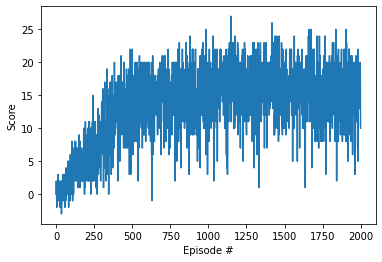

In [7]:
# 3 FC with act (max=64)
scores = dqn(agent, 
             env, 
             brain_name, 
             n_episodes=2000, 
             max_t=1000, 
             eps_start=1.0, 
             eps_end=0.01, 
             eps_decay=0.995)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

## Visualize model performance

In [7]:
import time

# def test_agent(agent, env, brain_name, times=5, max_t=500, freq=1000):
def test_agent(model_path, env, brain_name, times=5, max_t=2500, freq=25):
    
    t_step = 0
    alpha = 0.1
    gamma = 0.99
    epsilon = 0.99
    agent = Agent(state_size=37, 
                  action_size=4,
                  t_step=t_step,
                  alpha=alpha,
                  model_path=model_path,
                  seed=0)
    
    scores = []
    for i in range(times):
        env_info = env.reset(train_mode=False)[brain_name]
        state = env_info.vector_observations[0]         
        score = 0                                       
        for i in range(max_t):
            action = agent.act(state, eps=0) # eps = 0 means the policy is 100% greedy
            env_info = env.step(action.astype(np.int32))[brain_name] 
            next_state = env_info.vector_observations[0]
            reward = env_info.rewards[0]                
            done = env_info.local_done[0]
            score += reward
            state = next_state
            if done:
                break
            time.sleep(1/freq)
        
        scores.append(score)
        print(f"Episode ended with score: {score}. Starting a new one")
        time.sleep(2)
        
    return scores

In [8]:
model_path = "./dqn_3fc_act_nodrop_avg17.pth"
test_agent(model_path, env, brain_name)

Loading model from file ./dqn_3fc_act_nodrop_avg17.pth
Episode ended with score: 19.0. Starting a new one
Episode ended with score: 16.0. Starting a new one
Episode ended with score: 20.0. Starting a new one
Episode ended with score: 17.0. Starting a new one


KeyboardInterrupt: 

# --------------------------------------------------------------------------------------------------------

# Implementing improvements: Prioritized Experience Replay, Double DQN, Dueling DQN



# Prioritized Experience Replay Buffer

Prioritized Experience Replay samples the history buffer using a probability for each state, based on the intensity of its error when calculating the target and loss.

For this improvement, the method act from the Agent class was altered to also store the delta error, which is calculated in a new method called calculate_delta_error.

Also, the add and the sample methods from the PrioritizedReplayBuffer were modified, the former to also add the error to the named tuple, and the latter for using the probability when choosing the samples.

In [5]:
import numpy as np
import random
from collections import namedtuple, deque
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


class QNetwork(nn.Module):
    """Actor (Policy) Model."""

    def __init__(self, state_size, action_size, seed):
        """Initialize parameters and build model.
        Params
        ======
            state_size (int): Dimension of each state
            action_size (int): Dimension of each action
            seed (int): Random seed
        """
        super(QNetwork, self).__init__()
        self.seed = torch.manual_seed(seed)
        """
        TODO: IMPROVE MODEL
        """
        self.fc1 = nn.Linear(state_size, 64)
        self.ac1 = nn.ReLU()
        self.fc2 = nn.Linear(64, 64)
        self.ac2 = nn.ReLU()
        self.fc3 = nn.Linear(64, action_size)
        
        """
        TODO: IMPLEMENT DUELING DQNS: SEPARATE VALUE FROM ACTION
        
        
        ONE NET OUTPUT WILL BE A SINGLE VALUE FOR THE STATE
        THE OTHER OUTPUT WILL BE ONE VALUE FOR EACH ACTION ???
        """

    def preprocess_input(self, state):
        return state

    def forward(self, state):
        """Build a network that maps state -> action values."""
        x = self.ac1(self.fc1(state))
        x = self.ac2(self.fc2(x))
        x = self.fc3(x)
        return x


class Agent():
    """Interacts with and learns from the environment."""

    def __init__(self, 
                 state_size, 
                 action_size,
                 t_step=0,
                 alpha=0.1,
                 model_path=None,
                 buffer_size=int(1e5),
                 batch_size=64,
                 gamma=0.99,
                 tau=1e-3,
                 learning_rate=5e-4,
                 update_every=4,
                 seed=0):
        """Initialize an Agent object.
        
        Params
        ======
            state_size (int): dimension of each state
            action_size (int): dimension of each action
            seed (int): random seed
        """
        self.state_size = state_size
        self.action_size = action_size
        self.seed = random.seed(seed)
        self.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

        # Q-Network
        if not model_path:
            self.qnetwork_local = QNetwork(state_size, action_size, seed).to(self.device)
            self.qnetwork_target = QNetwork(state_size, action_size, seed).to(self.device)
            self.optimizer = optim.Adam(self.qnetwork_local.parameters(), lr=learning_rate)
            self.training = True
        else:
            print(f"Loading model from file {model_path}")
            self.qnetwork_local = QNetwork(state_size, action_size, seed).to(self.device)
            self.qnetwork_target = QNetwork(state_size, action_size, seed).to(self.device)
            self.qnetwork_local.load_state_dict(torch.load(model_path))
            self.qnetwork_target.load_state_dict(torch.load(model_path))
            self.training = False
        
        # Replay memory
        self.memory = PrioritizedReplayBuffer(action_size, buffer_size, batch_size, seed, self.device)
        
        # Initialize time step (for updating every UPDATE_EVERY steps)
        self.t_step = t_step
        self.alpha = alpha
        self.buffer_size = buffer_size
        self.batch_size = batch_size
        self.gamma = gamma
        self.tau = tau
        self.learning_rate = learning_rate
        self.update_every = update_every
        

    def learn(self, experiences, gamma):
        """Update value parameters using given batch of experience tuples.

        Params
        ======
            experiences (Tuple[torch.Tensor]): tuple of (s, a, r, s', done) tuples 
            gamma (float): discount factor
        """
        states, actions, rewards, next_states, dones = experiences
        
        

        # Compute target values: # reward + gamma * max(Q(s', a')) * (1-done)
        td_targets_next_states = self.qnetwork_target(next_states).detach().max(1)[0].unsqueeze(1)
        td_targets = rewards + (gamma*td_targets_next_states * (1-dones))
        
        """
        TODO: IMPLEMENT DOUBLE DQN: INSTEAD OF CALCULATING THE MAX VALUE USING THE TARGET NETWORK, 
        WE WILL GET THE INDEX OF THE ACTION USING THE LOCAL NETWORK. WITH THIS INDEX, WE WILL GET THE VALUE CALCULATED
        USING THE TARGET NETWORK
        
        From the paper:
        In the original Double Q-learning algorithm, two value
        functions are learned by assigning each experience randomly to update one of the two value functions, such that
        there are two sets of weights, θ and θ`. For each update, one
        set of weights is used to determine the greedy policy and the
        other to determine its value. For a clear comparison, we can
        first untangle the selection and evaluation in Q-learning and
        rewrite its target (2) as
        
        PSEUDOCODE
        td_targets_next_states_indexes = np.argmax(self.qnetwork_local(next_states), axis=1)
        td_targets_next_states = self.qnetwork_target(next_states).gather(td_targets_next_states_indexes)
        
        """
        
#         print(f"td_targets_next_states: {td_targets_next_states.shape}. Should be {rewards.shape[0]}")
        
        
        # Current Q values
        q_values_local = self.qnetwork_local(states).gather(1, actions) # Q
        
        # compute loss
        loss = F.mse_loss(q_values_local, td_targets)
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        # ------------------- update target network ------------------- # # Only update the target network after we pass on the samples
        self.soft_update(self.qnetwork_local, self.qnetwork_target, self.tau)                     


    def soft_update(self, local_model, target_model, tau):
        """Soft update model parameters.
        θ_target = τ*θ_local + (1 - τ)*θ_target

        Params
        ======
            local_model (PyTorch model): weights will be copied from
            target_model (PyTorch model): weights will be copied to
            tau (float): interpolation parameter 
        """
        for target_param, local_param in zip(target_model.parameters(), local_model.parameters()):
            target_param.data.copy_(tau*local_param.data + (1.0-tau)*target_param.data)

            
    def calculate_error_delta(self, state, action, reward, next_state, done):
        """
        TODO: compute the error delta for the current state, action, reward and next_stat set
        """
        # Compute target values: # reward + gamma * max(Q(s', a')) * (1-done)
        # transform input state to torch structure
        state = torch.from_numpy(state).float().unsqueeze(0).to(self.device)
        next_state = torch.from_numpy(next_state).float().unsqueeze(0).to(self.device)
        action = np.asarray(action)
        action = torch.from_numpy(action).long().unsqueeze(0).to(self.device)
        action = action.expand(1,1)
#         print(f"State: {state.size()}. Next state: {next_state.size()}. Action: {action.size()}")
        
        # VANILA DQN. DO DOUBLE DQN LATER
        td_targets_next_state = self.qnetwork_target(next_state).detach().max(1)[0].unsqueeze(1)
        td_target = reward + (gamma*td_targets_next_state * (1-done)) # Target
        q_value_local = self.qnetwork_local(state).gather(1, action) # Q current
        return abs(td_target - q_value_local)

            
    def step(self, state, action, reward, next_state, done):
        
        """
        TODO: add error delta to the memory along each entry
        """
        error = self.calculate_error_delta(state, action, reward, next_state, done)
        # Save experience in replay memory
        self.memory.add(state, action, reward, next_state, done, error)
        
        # Learn every UPDATE_EVERY time steps.
        self.t_step = (self.t_step + 1) % self.update_every
        if self.t_step == 0:
            # If enough samples are available in memory, get random subset and learn
            if len(self.memory) > self.batch_size:
                experiences = self.memory.sample()
                self.learn(experiences, self.gamma)

                
    def act(self, state, eps=0.):
        """Returns actions for given state as per current policy.
        
        Params
        ======
            state (array_like): current state
            eps (float): epsilon, for epsilon-greedy action selection
        """
        state = torch.from_numpy(state).float().unsqueeze(0).to(self.device)
        self.qnetwork_local.eval()
        with torch.no_grad():
            action_values = self.qnetwork_local(state)
            
        if self.training:
            self.qnetwork_local.train()
        
        # Epsilon-greedy action selection
        if random.random() > eps:
            return np.argmax(action_values.cpu().data.numpy())
        else:
            return random.choice(np.arange(self.action_size))


class PrioritizedReplayBuffer:
    """
    TODO: IMPLEMENT PRIORITIZED EXPERIENCE REPLAY
    
    """    
    """Fixed-size buffer to store experience tuples."""

    def __init__(self, action_size, buffer_size, batch_size, seed, device):
        """Initialize a ReplayBuffer object.

        Params
        ======
            action_size (int): dimension of each action
            buffer_size (int): maximum size of buffer
            batch_size (int): size of each training batch
            seed (int): random seed
        """
        self.device = device
        self.action_size = action_size
        self.memory = deque(maxlen=buffer_size)  
        self.batch_size = batch_size
        self.experience = namedtuple("Experience", field_names=["state", "action", "reward", "next_state", "done", "error"])
        self.seed = random.seed(seed)
        self.a = 1
    
    def add(self, state, action, reward, next_state, done, error):
        """Add a new experience to memory."""
        e = self.experience(state, action, reward, next_state, done, error)
        self.memory.append(e)
    
    def sample(self):
        """Randomly sample a batch of experiences from memory."""
        
        # Choose samples based on the probability, which is proportional to the error 
        priorities = np.asarray([e.error for e in self.memory], dtype=np.float64)
        with torch.no_grad():
            probabilities = priorities / sum(priorities) # It gives out a torch grad error, but this has never been in the graph, so why????? 
        experiences = random.choices(self.memory, k=self.batch_size, weights=probabilities)
        
#         # now it is choosing the samples randomly. Change it to use the prioritized formula
#         experiences = random.sample(self.memory, k=self.batch_size)

        states = torch.from_numpy(np.vstack([e.state for e in experiences if e is not None])).float().to(self.device)
        actions = torch.from_numpy(np.vstack([e.action for e in experiences if e is not None])).long().to(self.device)
        rewards = torch.from_numpy(np.vstack([e.reward for e in experiences if e is not None])).float().to(self.device)
        next_states = torch.from_numpy(np.vstack([e.next_state for e in experiences if e is not None])).float().to(self.device)
        dones = torch.from_numpy(np.vstack([e.done for e in experiences if e is not None]).astype(np.uint8)).float().to(self.device)
  
        return (states, actions, rewards, next_states, dones)

    def __len__(self):
        """Return the current size of internal memory."""
        return len(self.memory)


## Train prioritized experience replay

In [3]:
from unityagents import UnityEnvironment
import numpy as np

env = UnityEnvironment(file_name="../banana_unity_env/Banana.exe")

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [7]:
t_step = 0
alpha = 0.1
gamma = 0.99
epsilon = 0.99
agent = Agent(state_size=37, 
              action_size=4,
              t_step=t_step,
              alpha=alpha,
              gamma=gamma,
              seed=0)


n_episodes=2000
max_t=1000
eps_start=1.0
eps_end=0.01
eps_decay=0.995

scores = dqn(agent, env, brain_name, n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

Episode 100	Average Score: 0.75	Average steps per second:87.40199630528595
Episode 200	Average Score: 2.33	Average steps per second:52.155207561272024
Episode 300	Average Score: 4.80	Average steps per second:38.664785989062846
Episode 400	Average Score: 5.38	Average steps per second:34.786267963992547
Episode 500	Average Score: 6.22	Average steps per second:33.907974001244654
Episode 600	Average Score: 6.78	Average steps per second:34.395216746488586


KeyboardInterrupt: 

## Note:

The Prioritized Experience Replay algorithm, the way it was implemented by myself, is not efficient. It takes between 2 to 3 times longer to compute each step. This can be seen in the Average steps per second variable output

The reason for this is probable because at each step, we are computing the error delta, which uses both the local and the target networks, so it runs one state at one network at a time (no parallelization). The architecture already used the local network to get the next action, so I'm not sure what's the impact there. Also, at each batch training, the new code computes more stuff with the new replay buffer. 

# Double DQN

The double DQN consists on separating the act of choosing the next state (target) action, and evaluating it. So when calculating the target, we will first use the local network to perform a forward pass with the input state, then we choose the action with a simple argmax. 

Once we have the next action chosen, we use the target network to evaluate it. This modification aims to reduce the overestimation of the action values, which is a known probelm with the DQN algorithm.

All necessary changes to accomplish this are present in the learn method of the Agent class.

In [40]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class QNetwork(nn.Module):
    """Actor (Policy) Model."""

    def __init__(self, state_size, action_size, seed):
        """Initialize parameters and build model.
        Params
        ======
            state_size (int): Dimension of each state
            action_size (int): Dimension of each action
            seed (int): Random seed
        """
        super(QNetwork, self).__init__()
        self.seed = torch.manual_seed(seed)
        self.fc1 = nn.Linear(state_size, 64)
        self.ac1 = nn.ReLU()
        self.fc2 = nn.Linear(64, 64)
        self.ac2 = nn.ReLU()
        self.fc3 = nn.Linear(64, action_size)

    def preprocess_input(self, state):
        return state

    def forward(self, state):
        """Build a network that maps state -> action values."""
        # perform the forward pass
        # x = self.preprocess_input(state)
        x = self.ac1(self.fc1(state))
        x = self.ac2(self.fc2(x))
        x = self.fc3(x)
        # x = self.model(state)
        return x
    
    
import numpy as np
import random
from collections import namedtuple, deque
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
import torch.optim as optim


class Agent():
    """Interacts with and learns from the environment."""

    def __init__(self, 
                 state_size, 
                 action_size,
                 t_step=0,
                 alpha=0.1,
                 model_path=None,
                 buffer_size=int(1e5),
                 batch_size=64,
                 gamma=0.99,
                 tau=1e-3,
                 learning_rate=5e-4,
                 update_every=4,
                 seed=0):
        """Initialize an Agent object.
        
        Params
        ======
            state_size (int): dimension of each state
            action_size (int): dimension of each action
            seed (int): random seed
        """
        self.state_size = state_size
        self.action_size = action_size
        self.seed = random.seed(seed)
        
        self.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

        # Q-Network
        if not model_path:
            print(f"Creating new models for local and target networks.")
            self.qnetwork_local = QNetwork(state_size, action_size, seed).to(self.device)
            self.qnetwork_target = QNetwork(state_size, action_size, seed).to(self.device)
            self.optimizer = optim.Adam(self.qnetwork_local.parameters(), lr=learning_rate)
            self.training = True
        else:
            print(f"Loading model from file {model_path}")
            self.qnetwork_local = QNetwork(state_size, action_size, seed).to(self.device)
            self.qnetwork_target = QNetwork(state_size, action_size, seed).to(self.device)
            self.qnetwork_local.load_state_dict(torch.load(model_path))
            self.qnetwork_target.load_state_dict(torch.load(model_path))
            self.training = False
        
        # Replay memory
        self.memory = ReplayBuffer(action_size, buffer_size, batch_size, seed, self.device)
        
        # Initialize time step (for updating every UPDATE_EVERY steps)
        self.t_step = t_step
        self.alpha = alpha
        self.buffer_size = buffer_size
        self.batch_size = batch_size
        self.gamma = gamma
        self.tau = tau
        self.learning_rate = learning_rate
        self.update_every = update_every
        

    def learn(self, experiences, gamma):
        """Update value parameters using given batch of experience tuples.

        Params
        ======
            experiences (Tuple[torch.Tensor]): tuple of (s, a, r, s', done) tuples 
            gamma (float): discount factor
        """
        states, actions, rewards, next_states, dones = experiences

#         # Compute target values: # reward + gamma * max(Q(s', a')) * (1-done)
#         td_targets_next_states = self.qnetwork_target(next_states).detach().max(1)[0].unsqueeze(1)
#         td_targets = rewards + (gamma*td_targets_next_states * (1-dones))
        
        """
        TODO: IMPLEMENT DOUBLE DQN: INSTEAD OF CALCULATING THE MAX VALUE USING THE TARGET NETWORK, 
        WE WILL GET THE INDEX OF THE ACTION USING THE LOCAL NETWORK. WITH THIS INDEX, WE WILL GET THE VALUE CALCULATED
        USING THE TARGET NETWORK
        
        From the paper:
        "In the original Double Q-learning algorithm, two value
        functions are learned by assigning each experience randomly to update one of the two value functions, such that
        there are two sets of weights, θ and θ`. For each update, one
        set of weights is used to determine the greedy policy and the
        other to determine its value. For a clear comparison, we can
        first untangle the selection and evaluation in Q-learning..."
        
        PSEUDOCODE
        td_targets_next_states_indexes = np.argmax(self.qnetwork_local(next_states), axis=1)
        td_targets_next_states = self.qnetwork_target(next_states).gather(td_targets_next_states_indexes)
        
        """
        td_targets_next_states_indexes = np.argmax(self.qnetwork_local(next_states).detach(), axis=1).unsqueeze(1) # Get the action index using the local network
        td_targets_next_states = self.qnetwork_target(next_states).detach().gather(1, td_targets_next_states_indexes) # use the indexes to get the values from the target network
        td_targets = rewards + (gamma*td_targets_next_states * (1-dones)) # calculate the target just as before
              
        # Current Q values
        q_values_local = self.qnetwork_local(states).gather(1, actions) # Q
        
        # compute loss
        loss = F.mse_loss(q_values_local, td_targets)
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        # ------------------- update target network ------------------- # # Only update the target network after we pass on the samples
        self.soft_update(self.qnetwork_local, self.qnetwork_target, self.tau)                     


    def soft_update(self, local_model, target_model, tau):
        """Soft update model parameters.
        θ_target = τ*θ_local + (1 - τ)*θ_target

        Params
        ======
            local_model (PyTorch model): weights will be copied from
            target_model (PyTorch model): weights will be copied to
            tau (float): interpolation parameter 
        """
        for target_param, local_param in zip(target_model.parameters(), local_model.parameters()):
            target_param.data.copy_(tau*local_param.data + (1.0-tau)*target_param.data)
            
            
    def step(self, state, action, reward, next_state, done):
        # Save experience in replay memory
        self.memory.add(state, action, reward, next_state, done)
        
        # Learn every UPDATE_EVERY time steps.
        self.t_step = (self.t_step + 1) % self.update_every
        if self.t_step == 0:
            # If enough samples are available in memory, get random subset and learn
            if len(self.memory) > self.batch_size:
                experiences = self.memory.sample()
                self.learn(experiences, self.gamma)

                
    def act(self, state, eps=0.):
        """Returns actions for given state as per current policy.
        
        Params
        ======
            state (array_like): current state
            eps (float): epsilon, for epsilon-greedy action selection
        """
        state = torch.from_numpy(state).float().unsqueeze(0).to(self.device)
        self.qnetwork_local.eval()
        with torch.no_grad():
            action_values = self.qnetwork_local(state)
            
        if self.training:
            self.qnetwork_local.train()
        
        # Epsilon-greedy action selection
        if random.random() > eps:
            return np.argmax(action_values.cpu().data.numpy())
        else:
            return random.choice(np.arange(self.action_size))


class ReplayBuffer: 
    """Fixed-size buffer to store experience tuples."""

    def __init__(self, action_size, buffer_size, batch_size, seed, device):
        """Initialize a ReplayBuffer object.

        Params
        ======
            action_size (int): dimension of each action
            buffer_size (int): maximum size of buffer
            batch_size (int): size of each training batch
            seed (int): random seed
        """
        self.device = device
        self.action_size = action_size
        self.memory = deque(maxlen=buffer_size)  
        self.batch_size = batch_size
        self.experience = namedtuple("Experience", field_names=["state", "action", "reward", "next_state", "done"])
        self.seed = random.seed(seed)
    
    def add(self, state, action, reward, next_state, done):
        """Add a new experience to memory."""
        e = self.experience(state, action, reward, next_state, done)
        self.memory.append(e)
    
    def sample(self):
        """Randomly sample a batch of experiences from memory."""
        experiences = random.sample(self.memory, k=self.batch_size)

        states = torch.from_numpy(np.vstack([e.state for e in experiences if e is not None])).float().to(self.device)
        actions = torch.from_numpy(np.vstack([e.action for e in experiences if e is not None])).long().to(self.device)
        rewards = torch.from_numpy(np.vstack([e.reward for e in experiences if e is not None])).float().to(self.device)
        next_states = torch.from_numpy(np.vstack([e.next_state for e in experiences if e is not None])).float().to(self.device)
        dones = torch.from_numpy(np.vstack([e.done for e in experiences if e is not None]).astype(np.uint8)).float().to(self.device)
  
        return (states, actions, rewards, next_states, dones)

    def __len__(self):
        """Return the current size of internal memory."""
        return len(self.memory)


In [ ]:
from unityagents import UnityEnvironment
import numpy as np

env = UnityEnvironment(file_name="../banana_unity_env/Banana.exe")

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

Creating new models for local and target networks.
Episode 100	Average Score: 0.19	Average steps per second:197.83916004046083
Episode 200	Average Score: 2.54	Average steps per second:194.13369824759113
Episode 254	Average Score: 5.07	Average steps per second:177.95805026969063
Overwriting last checkpiont with current average score: 5.07
Episode 255	Average Score: 5.11	Average steps per second:181.14264386583423
Overwriting last checkpiont with current average score: 5.11
Episode 256	Average Score: 5.19	Average steps per second:185.10638898327176
Overwriting last checkpiont with current average score: 5.19
Episode 257	Average Score: 5.24	Average steps per second:175.65388493542557
Overwriting last checkpiont with current average score: 5.24
Episode 258	Average Score: 5.28	Average steps per second:179.31531663437144
Overwriting last checkpiont with current average score: 5.28
Episode 259	Average Score: 5.29	Average steps per second:192.47169910065568
Overwriting last checkpiont with cur

Episode 327	Average Score: 7.86	Average steps per second:187.79398884044824
Overwriting last checkpiont with current average score: 7.86
Episode 328	Average Score: 7.94	Average steps per second:193.8969985548523
Overwriting last checkpiont with current average score: 7.94
Episode 329	Average Score: 8.04	Average steps per second:194.8857925403669
Overwriting last checkpiont with current average score: 8.04
Episode 330	Average Score: 8.05	Average steps per second:191.16124317764093
Overwriting last checkpiont with current average score: 8.05
Episode 331	Average Score: 8.08	Average steps per second:194.14647111094598
Overwriting last checkpiont with current average score: 8.08
Episode 332	Average Score: 8.13	Average steps per second:186.08093034463562
Overwriting last checkpiont with current average score: 8.13
Episode 333	Average Score: 8.17	Average steps per second:192.72687394730696
Overwriting last checkpiont with current average score: 8.17
Episode 338	Average Score: 8.26	Average ste

Episode 432	Average Score: 10.84	Average steps per second:188.41220684559536
Overwriting last checkpiont with current average score: 10.84
Episode 433	Average Score: 10.90	Average steps per second:191.072120648303
Overwriting last checkpiont with current average score: 10.9
Episode 434	Average Score: 10.95	Average steps per second:185.39448217586042
Overwriting last checkpiont with current average score: 10.95
Episode 435	Average Score: 10.99	Average steps per second:184.4719150706323
Overwriting last checkpiont with current average score: 10.99
Episode 436	Average Score: 11.03	Average steps per second:188.80163073465107
Overwriting last checkpiont with current average score: 11.03
Episode 437	Average Score: 11.05	Average steps per second:178.55059667454563
Overwriting last checkpiont with current average score: 11.05
Episode 438	Average Score: 11.08	Average steps per second:187.2728646009806
Overwriting last checkpiont with current average score: 11.08
Episode 439	Average Score: 11.15

Episode 525	Average Score: 14.04	Average steps per second:183.87555020946859
Overwriting last checkpiont with current average score: 14.04
Episode 534	Average Score: 14.08	Average steps per second:185.76854701558632
Overwriting last checkpiont with current average score: 14.08
Episode 547	Average Score: 14.10	Average steps per second:191.02619385192992
Overwriting last checkpiont with current average score: 14.1
Episode 548	Average Score: 14.12	Average steps per second:186.16490382816912
Overwriting last checkpiont with current average score: 14.12
Episode 550	Average Score: 14.13	Average steps per second:193.29206532643724
Overwriting last checkpiont with current average score: 14.13
Episode 551	Average Score: 14.18	Average steps per second:189.19826204499373
Overwriting last checkpiont with current average score: 14.18
Episode 552	Average Score: 14.25	Average steps per second:189.27598864914776
Overwriting last checkpiont with current average score: 14.25
Episode 554	Average Score: 1

Episode 845	Average Score: 16.17	Average steps per second:185.5143559118221
Overwriting last checkpiont with current average score: 16.17
Episode 846	Average Score: 16.25	Average steps per second:160.7005407655136
Overwriting last checkpiont with current average score: 16.25
Episode 900	Average Score: 15.62	Average steps per second:190.82708415311123
Episode 1000	Average Score: 14.88	Average steps per second:192.98513175218807
Episode 1100	Average Score: 16.13	Average steps per second:192.57585251610762
Episode 1200	Average Score: 15.95	Average steps per second:192.39321521138992
Episode 1213	Average Score: 16.28	Average steps per second:193.08389601495776
Overwriting last checkpiont with current average score: 16.28
Episode 1214	Average Score: 16.47	Average steps per second:192.23570261625758
Overwriting last checkpiont with current average score: 16.47
Episode 1244	Average Score: 16.50	Average steps per second:190.80638315191138
Overwriting last checkpiont with current average score:

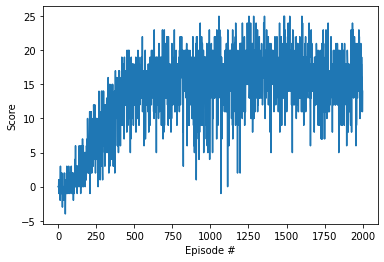

In [39]:
t_step = 0
alpha = 0.1
gamma = 0.99
epsilon = 0.99
agent = Agent(state_size=37, 
              action_size=4,
              t_step=t_step,
              alpha=alpha,
              gamma=gamma,
              seed=0)


n_episodes=2000
max_t=1000
eps_start=1.0
eps_end=0.01
eps_decay=0.995

scores = dqn(agent, env, brain_name, n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

# Dueling DQN

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class QNetwork(nn.Module): # TODO
    """Actor (Policy) Model."""

    def __init__(self, state_size, action_size, seed):
        """Initialize parameters and build model.
        Params
        ======
            state_size (int): Dimension of each state
            action_size (int): Dimension of each action
            seed (int): Random seed
        """
        
                
        """
        TODO: IMPLEMENT DUELING DQNS: SEPARATE VALUE FROM ACTION
        
        
        ONE NET OUTPUT WILL BE A SINGLE VALUE FOR THE STATE
        THE OTHER OUTPUT WILL BE ONE VALUE FOR EACH ACTION ???
        
        """
        self.action_size = action_size
        super(QNetwork, self).__init__()
        self.seed = torch.manual_seed(seed)
        self.fc1 = nn.Linear(state_size, 64)
        self.ac1 = nn.ReLU()
        
        # Advantage values
        self.fc2_a = nn.Linear(64, 64)
        self.ac2_a = nn.ReLU()
        self.fc3_a = nn.Linear(64, action_size)
#         self.ac3_a = nn.ReLU()
        
        # State value
        self.fc2_s = nn.Linear(64, 64)
        self.ac2_s = nn.ReLU()
        self.fc3_s = nn.Linear(64, 1)
#         self.ac3_s = nn.ReLU()

    def preprocess_input(self, state):
        return state

    def forward(self, state): # TODO
        """Build a network that maps state -> action values."""
        # perform the forward pass
        # x = self.preprocess_input(state)
        x = self.ac1(self.fc1(state))
        
        # advantage values
        ad = self.ac2_a(self.fc2_a(x))
        ad = self.fc3_a(ad)
        
        # state value 
        sv = self.ac2_s(self.fc2_s(x))
        sv = self.fc3_s(sv)
        
# #         print(f"Advantage tensor shape: {ad.shape}. State value: {sv.shape}")
#         print(f"Advantage tensor: {ad}. State value: {sv}")
#         print(f"Sum: {ad+sv}")
        return ad + sv
    
    
import numpy as np
import random
from collections import namedtuple, deque
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
import torch.optim as optim


class Agent():
    """Interacts with and learns from the environment."""

    def __init__(self, 
                 state_size, 
                 action_size,
                 t_step=0,
                 alpha=0.1,
                 model_path=None,
                 buffer_size=int(1e5),
                 batch_size=64,
                 gamma=0.99,
                 tau=1e-3,
                 learning_rate=5e-4,
                 update_every=4,
                 seed=0):
        """Initialize an Agent object.
        
        Params
        ======
            state_size (int): dimension of each state
            action_size (int): dimension of each action
            seed (int): random seed
        """
        self.state_size = state_size
        self.action_size = action_size
        self.seed = random.seed(seed)
        
        self.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

        # Q-Network
        if not model_path:
            print(f"Creating new models for local and target networks.")
            self.qnetwork_local = QNetwork(state_size, action_size, seed).to(self.device)
            self.qnetwork_target = QNetwork(state_size, action_size, seed).to(self.device)
            self.optimizer = optim.Adam(self.qnetwork_local.parameters(), lr=learning_rate)
            self.training = True
        else:
            print(f"Loading model from file {model_path}")
            self.qnetwork_local = QNetwork(state_size, action_size, seed).to(self.device)
            self.qnetwork_target = QNetwork(state_size, action_size, seed).to(self.device)
            self.qnetwork_local.load_state_dict(torch.load(model_path))
            self.qnetwork_target.load_state_dict(torch.load(model_path))
            self.training = False
        
        # Replay memory
        self.memory = ReplayBuffer(action_size, buffer_size, batch_size, seed, self.device)
        
        # Initialize time step (for updating every UPDATE_EVERY steps)
        self.t_step = t_step
        self.alpha = alpha
        self.buffer_size = buffer_size
        self.batch_size = batch_size
        self.gamma = gamma
        self.tau = tau
        self.learning_rate = learning_rate
        self.update_every = update_every
        

    def learn(self, experiences, gamma):
        """Update value parameters using given batch of experience tuples.

        Params
        ======
            experiences (Tuple[torch.Tensor]): tuple of (s, a, r, s', done) tuples 
            gamma (float): discount factor
        """
        states, actions, rewards, next_states, dones = experiences

        # Compute target values: # reward + gamma * max(Q(s', a')) * (1-done)
        td_targets_next_states = self.qnetwork_target(next_states).detach().max(1)[0].unsqueeze(1)
        td_targets = rewards + (gamma*td_targets_next_states * (1-dones))
                     
        # Current Q values
        q_values_local = self.qnetwork_local(states).gather(1, actions) # Q
        
        # compute loss
        loss = F.mse_loss(q_values_local, td_targets)
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        # ------------------- update target network ------------------- # # Only update the target network after we pass on the samples
        self.soft_update(self.qnetwork_local, self.qnetwork_target, self.tau)                     


    def soft_update(self, local_model, target_model, tau):
        """Soft update model parameters.
        θ_target = τ*θ_local + (1 - τ)*θ_target

        Params
        ======
            local_model (PyTorch model): weights will be copied from
            target_model (PyTorch model): weights will be copied to
            tau (float): interpolation parameter 
        """
        for target_param, local_param in zip(target_model.parameters(), local_model.parameters()):
            target_param.data.copy_(tau*local_param.data + (1.0-tau)*target_param.data)
            
            
    def step(self, state, action, reward, next_state, done):
        # Save experience in replay memory
        self.memory.add(state, action, reward, next_state, done)
        
        # Learn every UPDATE_EVERY time steps.
        self.t_step = (self.t_step + 1) % self.update_every
        if self.t_step == 0:
            # If enough samples are available in memory, get random subset and learn
            if len(self.memory) > self.batch_size:
                experiences = self.memory.sample()
                self.learn(experiences, self.gamma)

                
    def act(self, state, eps=0.):
        """Returns actions for given state as per current policy.
        
        Params
        ======
            state (array_like): current state
            eps (float): epsilon, for epsilon-greedy action selection
        """
        state = torch.from_numpy(state).float().unsqueeze(0).to(self.device)
        self.qnetwork_local.eval()
        with torch.no_grad():
            action_values = self.qnetwork_local(state)
            
        if self.training:
            self.qnetwork_local.train()
        
        # Epsilon-greedy action selection
        if random.random() > eps:
            return np.argmax(action_values.cpu().data.numpy())
        else:
            return random.choice(np.arange(self.action_size))


class ReplayBuffer: 
    """Fixed-size buffer to store experience tuples."""

    def __init__(self, action_size, buffer_size, batch_size, seed, device):
        """Initialize a ReplayBuffer object.

        Params
        ======
            action_size (int): dimension of each action
            buffer_size (int): maximum size of buffer
            batch_size (int): size of each training batch
            seed (int): random seed
        """
        self.device = device
        self.action_size = action_size
        self.memory = deque(maxlen=buffer_size)  
        self.batch_size = batch_size
        self.experience = namedtuple("Experience", field_names=["state", "action", "reward", "next_state", "done"])
        self.seed = random.seed(seed)
    
    def add(self, state, action, reward, next_state, done):
        """Add a new experience to memory."""
        e = self.experience(state, action, reward, next_state, done)
        self.memory.append(e)
    
    def sample(self):
        """Randomly sample a batch of experiences from memory."""
        experiences = random.sample(self.memory, k=self.batch_size)

        states = torch.from_numpy(np.vstack([e.state for e in experiences if e is not None])).float().to(self.device)
        actions = torch.from_numpy(np.vstack([e.action for e in experiences if e is not None])).long().to(self.device)
        rewards = torch.from_numpy(np.vstack([e.reward for e in experiences if e is not None])).float().to(self.device)
        next_states = torch.from_numpy(np.vstack([e.next_state for e in experiences if e is not None])).float().to(self.device)
        dones = torch.from_numpy(np.vstack([e.done for e in experiences if e is not None]).astype(np.uint8)).float().to(self.device)
  
        return (states, actions, rewards, next_states, dones)

    def __len__(self):
        """Return the current size of internal memory."""
        return len(self.memory)


In [6]:
from unityagents import UnityEnvironment
import numpy as np

env = UnityEnvironment(file_name="../banana_unity_env/Banana.exe")

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [ ]:
t_step = 0
alpha = 0.1
gamma = 0.99
epsilon = 0.99
agent = Agent(state_size=37, 
              action_size=4,
              t_step=t_step,
              alpha=alpha,
              gamma=gamma,
              seed=0)


n_episodes=2000
max_t=1000
eps_start=1.0
eps_end=0.01
eps_decay=0.995

scores = dqn(agent, env, brain_name, n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

Creating new models for local and target networks.
Episode 100	Average Score: 0.99	Average steps per second:180.17903527472018
Episode 200	Average Score: 4.37	Average steps per second:164.24858294154865
Episode 300	Average Score: 8.25	Average steps per second:176.88743578452542
Episode 400	Average Score: 10.29	Average steps per second:173.99885147431826
Episode 500	Average Score: 12.71	Average steps per second:192.25232348261937
Episode 600	Average Score: 14.43	Average steps per second:170.39982792849358
Episode 700	Average Score: 15.21	Average steps per second:182.92647434421044
Episode 800	Average Score: 14.95	Average steps per second:168.78548255526867
Episode 900	Average Score: 15.58	Average steps per second:164.56545623297308
Episode 1000	Average Score: 15.55	Average steps per second:165.2649089321022
Episode 1100	Average Score: 15.80	Average steps per second:160.76353651941026
Episode 1200	Average Score: 15.83	Average steps per second:167.42239837150917
Episode 1300	Average Score

# Putting the three improvements together: Prioritized experience replay, Double DQN and Dueling DQN


Now I implement an architecture that integrates the three improvements that were implemented above.

In [21]:
import numpy as np
import random
from collections import namedtuple, deque
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


class QNetwork(nn.Module): # TODO
    """Actor (Policy) Model."""

    def __init__(self, state_size, action_size, seed):
        """Initialize parameters and build model.
        Params
        ======
            state_size (int): Dimension of each state
            action_size (int): Dimension of each action
            seed (int): Random seed
        """
        
                
        """
        TODO: IMPLEMENT DUELING DQNS: SEPARATE VALUE FROM ACTION
        
        
        ONE NET OUTPUT WILL BE A SINGLE VALUE FOR THE STATE
        THE OTHER OUTPUT WILL BE ONE VALUE FOR EACH ACTION ???
        
        """
        self.action_size = action_size
        super(QNetwork, self).__init__()
        self.seed = torch.manual_seed(seed)
        self.fc1 = nn.Linear(state_size, 64)
        self.ac1 = nn.ReLU()
        
        # Advantage values
        self.fc2_a = nn.Linear(64, 64)
        self.ac2_a = nn.ReLU()
        self.fc3_a = nn.Linear(64, action_size)
#         self.ac3_a = nn.ReLU()
        
        # State value
        self.fc2_s = nn.Linear(64, 64)
        self.ac2_s = nn.ReLU()
        self.fc3_s = nn.Linear(64, 1)
#         self.ac3_s = nn.ReLU()

    def preprocess_input(self, state):
        return state

    def forward(self, state): # TODO
        """Build a network that maps state -> action values."""
        # perform the forward pass
        # x = self.preprocess_input(state)
        x = self.ac1(self.fc1(state))
        
        # advantage values
        ad = self.ac2_a(self.fc2_a(x))
        ad = self.fc3_a(ad)
        
        # state value 
        sv = self.ac2_s(self.fc2_s(x))
        sv = self.fc3_s(sv)

        return ad + sv


class Agent():
    """Interacts with and learns from the environment."""

    def __init__(self, 
                 state_size, 
                 action_size,
                 t_step=0,
                 model_path=None,
                 buffer_size=int(1e5),
                 batch_size=64,
                 gamma=0.99,
                 tau=1e-3,
                 learning_rate=5e-4,
                 update_every=4,
                 seed=0):
        """Initialize an Agent object.
        
        Params
        ======
            state_size (int): dimension of each state
            action_size (int): dimension of each action
            seed (int): random seed
        """
        self.state_size = state_size
        self.action_size = action_size
        self.seed = random.seed(seed)
        self.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

        # Q-Network
        if not model_path:
            self.qnetwork_local = QNetwork(state_size, action_size, seed).to(self.device)
            self.qnetwork_target = QNetwork(state_size, action_size, seed).to(self.device)
            self.optimizer = optim.Adam(self.qnetwork_local.parameters(), lr=learning_rate)
            self.training = True
        else:
            print(f"Loading model from file {model_path}")
            self.qnetwork_local = QNetwork(state_size, action_size, seed).to(self.device)
            self.qnetwork_target = QNetwork(state_size, action_size, seed).to(self.device)
            self.qnetwork_local.load_state_dict(torch.load(model_path))
            self.qnetwork_target.load_state_dict(torch.load(model_path))
            self.training = False
        
        # Replay memory
        self.memory = PrioritizedReplayBuffer(action_size, buffer_size, batch_size, seed, self.device)
        
        # Initialize time step (for updating every UPDATE_EVERY steps)
        self.t_step = t_step
        self.buffer_size = buffer_size
        self.batch_size = batch_size
        self.gamma = gamma
        self.tau = tau
        self.learning_rate = learning_rate
        self.update_every = update_every
        

    def learn(self, experiences, gamma):
        """Update value parameters using given batch of experience tuples.

        Params
        ======
            experiences (Tuple[torch.Tensor]): tuple of (s, a, r, s', done) tuples 
            gamma (float): discount factor
        """
        states, actions, rewards, next_states, dones = experiences      

#         # Compute target values: # reward + gamma * max(Q(s', a')) * (1-done)
#         td_targets_next_states = self.qnetwork_target(next_states).detach().max(1)[0].unsqueeze(1)
#         td_targets = rewards + (gamma*td_targets_next_states * (1-dones))
        
        """
        TODO: IMPLEMENT DOUBLE DQN: INSTEAD OF CALCULATING THE MAX VALUE USING THE TARGET NETWORK, 
        WE WILL GET THE INDEX OF THE ACTION USING THE LOCAL NETWORK. WITH THIS INDEX, WE WILL GET THE VALUE CALCULATED
        USING THE TARGET NETWORK
        
        From the paper:
        "In the original Double Q-learning algorithm, two value
        functions are learned by assigning each experience randomly to update one of the two value functions, such that
        there are two sets of weights, θ and θ`. For each update, one
        set of weights is used to determine the greedy policy and the
        other to determine its value. For a clear comparison, we can
        first untangle the selection and evaluation in Q-learning..."
        
        PSEUDOCODE
        td_targets_next_states_indexes = np.argmax(self.qnetwork_local(next_states), axis=1)
        td_targets_next_states = self.qnetwork_target(next_states).gather(td_targets_next_states_indexes)
        
        """
        td_targets_next_states_indexes = np.argmax(self.qnetwork_local(next_states).detach(), axis=1).unsqueeze(1) # Get the action index using the local network
        td_targets_next_states = self.qnetwork_target(next_states).detach().gather(1, td_targets_next_states_indexes) # use the indexes to get the values from the target network
        td_targets = rewards + (gamma*td_targets_next_states * (1-dones)) # calculate the target just as before
        
        
        # Current Q values
        q_values_local = self.qnetwork_local(states).gather(1, actions) # Q
        
        # compute loss
        loss = F.mse_loss(q_values_local, td_targets)
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        # ------------------- update target network ------------------- # # Only update the target network after we pass on the samples
        self.soft_update(self.qnetwork_local, self.qnetwork_target, self.tau)                     


    def soft_update(self, local_model, target_model, tau):
        """Soft update model parameters.
        θ_target = τ*θ_local + (1 - τ)*θ_target

        Params
        ======
            local_model (PyTorch model): weights will be copied from
            target_model (PyTorch model): weights will be copied to
            tau (float): interpolation parameter 
        """
        for target_param, local_param in zip(target_model.parameters(), local_model.parameters()):
            target_param.data.copy_(tau*local_param.data + (1.0-tau)*target_param.data)

            
    def calculate_error_delta(self, state, action, reward, next_state, done):
        """
        TODO: compute the error delta for the current state, action, reward and next_stat set
        """
        # Compute target values: # reward + gamma * max(Q(s', a')) * (1-done)
        # transform input state to torch structure
        state = torch.from_numpy(state).float().unsqueeze(0).to(self.device)
        next_state = torch.from_numpy(next_state).float().unsqueeze(0).to(self.device)
        action = np.asarray(action)
        action = torch.from_numpy(action).long().unsqueeze(0).to(self.device)
        action = action.expand(1,1)
#         print(f"State: {state.size()}. Next state: {next_state.size()}. Action: {action.size()}")
        
        # VANILA DQN. DO DOUBLE DQN LATER
#         td_targets_next_state = self.qnetwork_target(next_state).detach().max(1)[0].unsqueeze(1)
#         td_target = reward + (gamma*td_targets_next_state * (1-done)) # Target
        
        # Using double DQN
        td_targets_next_states_indexes = np.argmax(self.qnetwork_local(next_state).detach(), axis=1).unsqueeze(1) # Get the action index using the local network
        td_targets_next_states = self.qnetwork_target(next_state).detach().gather(1, td_targets_next_states_indexes) # use the indexes to get the values from the target network
        td_target = reward + (gamma*td_targets_next_states * (1-done)) # calculate the target just as before
        
        q_value_local = self.qnetwork_local(state).gather(1, action) # Q current
        return abs(td_target - q_value_local)

            
    def step(self, state, action, reward, next_state, done):
        
        """
        TODO: add error delta to the memory along each entry
        """
        error = self.calculate_error_delta(state, action, reward, next_state, done)
        # Save experience in replay memory
        self.memory.add(state, action, reward, next_state, done, error)
        
        # Learn every UPDATE_EVERY time steps.
        self.t_step = (self.t_step + 1) % self.update_every
        if self.t_step == 0:
            # If enough samples are available in memory, get random subset and learn
            if len(self.memory) > self.batch_size:
                experiences = self.memory.sample()
                self.learn(experiences, self.gamma)

                
    def act(self, state, eps=0.):
        """Returns actions for given state as per current policy.
        
        Params
        ======
            state (array_like): current state
            eps (float): epsilon, for epsilon-greedy action selection
        """
        state = torch.from_numpy(state).float().unsqueeze(0).to(self.device)
        self.qnetwork_local.eval()
        with torch.no_grad():
            action_values = self.qnetwork_local(state)
            
        if self.training:
            self.qnetwork_local.train()
        
        # Epsilon-greedy action selection
        if random.random() > eps:
            return np.argmax(action_values.cpu().data.numpy())
        else:
            return random.choice(np.arange(self.action_size))


class PrioritizedReplayBuffer:
    """Fixed-size buffer to store experience tuples."""
    def __init__(self, action_size, buffer_size, batch_size, seed, device):
        """Initialize a ReplayBuffer object.

        Params
        ======
            action_size (int): dimension of each action
            buffer_size (int): maximum size of buffer
            batch_size (int): size of each training batch
            seed (int): random seed
        """
        self.device = device
        self.action_size = action_size
        self.memory = deque(maxlen=buffer_size)  
        self.batch_size = batch_size
        self.experience = namedtuple("Experience", field_names=["state", "action", "reward", "next_state", "done", "error"])
        self.seed = random.seed(seed)
        self.a = 1
    
    def add(self, state, action, reward, next_state, done, error):
        """Add a new experience to memory."""
        e = self.experience(state, action, reward, next_state, done, error)
        self.memory.append(e)
    
    def sample(self):
        """Randomly sample a batch of experiences from memory."""
        
        # Choose samples based on the probability, which is proportional to the error 
        priorities = np.asarray([e.error for e in self.memory], dtype=np.float64)
        with torch.no_grad():
            probabilities = priorities / sum(priorities) # It gives out a torch grad error, but this has never been in the graph, so why????? 
        experiences = random.choices(self.memory, weights=probabilities)
        
#         # now it is choosing the samples randomly. Change it to use the prioritized formula
#         experiences = random.sample(self.memory, k=self.batch_size)

        states = torch.from_numpy(np.vstack([e.state for e in experiences if e is not None])).float().to(self.device)
        actions = torch.from_numpy(np.vstack([e.action for e in experiences if e is not None])).long().to(self.device)
        rewards = torch.from_numpy(np.vstack([e.reward for e in experiences if e is not None])).float().to(self.device)
        next_states = torch.from_numpy(np.vstack([e.next_state for e in experiences if e is not None])).float().to(self.device)
        dones = torch.from_numpy(np.vstack([e.done for e in experiences if e is not None]).astype(np.uint8)).float().to(self.device)
  
        return (states, actions, rewards, next_states, dones)

    def __len__(self):
        """Return the current size of internal memory."""
        return len(self.memory)


In [ ]:
from unityagents import UnityEnvironment
import numpy as np

env = UnityEnvironment(file_name="../banana_unity_env/Banana.exe")

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [22]:
t_step = 0
gamma = 0.99
epsilon = 0.99
agent = Agent(state_size=37, 
              action_size=4,
              t_step=t_step,
              gamma=gamma,
              seed=0)


n_episodes=2000
max_t=1000
eps_start=1.0
eps_end=0.01
eps_decay=0.995

scores = dqn(agent, env, brain_name, n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

Episode 100	Average Score: 0.72	Average steps per second:77.03412870351812
Episode 200	Average Score: 2.31	Average steps per second:50.677854696560964
Episode 295	Average Score: 5.16	Average steps per second:30.312363527859297

KeyboardInterrupt: 

# After checking with ChatGPT

Since we are in 2023, it would be imprudent of me to not use a LLM for double checking my result. I explained what I was doing and what the code does, asked if it was correct and pasted it. The result from OpenAI's ChatGPT was:

"The code seems to be mostly correct, but there are some parts that could use some improvement. Here are some suggestions:

1. Dueling DQN: The code includes the basic structure of a Dueling DQN network, but it is missing the final step of combining the advantage and state-value streams. You should add ad - torch.mean(ad) after ad = self.fc3_a(ad) and sv.expand(x.size(0), self.action_size) after sv = self.fc3_s(sv).

2. Double DQN: The code includes the basic structure of a Double DQN agent, but it is missing the final step of selecting the action based on the local network and getting the value based on the target network. You should add local_actions = self.qnetwork_local(next_states).detach().max(1)[1].unsqueeze(1) after local_values = self.qnetwork_local(next_states).gather(1, actions), and then replace td_targets_next_states = self.qnetwork_target(next_states).detach().max(1)[0].unsqueeze(1) with td_targets_next_states = self.qnetwork_target(next_states).gather(1, local_actions).

3. Prioritized Experience Replay: The code includes the basic structure of a PER buffer, but it is missing the implementation of the priorities. You should add max_prio = self.memory.max_priority() if self.memory.tree else 1.0 after states, actions, rewards, next_states, dones, indices, weights = self.memory.sample() to get the maximum priority in the tree, and then replace self.memory.add(states, actions, rewards, next_states, dones) with self.memory.add(states, actions, rewards, next_states, dones, max_prio) to include the priority in the buffer.

4. Training vs. evaluation: The code includes a flag self.training to indicate whether the agent is in training mode or evaluation mode. However, this flag is not used consistently throughout the code. You should update the code to use this flag consistently, for example by adding an if self.training: block around the loss.backward() and self.optimizer.step() lines in the learn method.

5. Miscellaneous: There are a few minor issues with the code that don't affect the correctness of the algorithm, but could be improved for readability and performance. For example, you can use F.relu instead of defining a ReLU layer separately, and you can use F.mse_loss instead of defining a mean squared error loss function separately. You can also remove the preprocess_input method from the QNetwork class, since it is not used."

In [7]:
# TESTING CHATGPT CORRECTIONS ON DOUBLE DQN AND DUELING DQN. REMOVED PRIORITIZED EXPERIENCE REPLAY FOR NOW BECAUSE IT HINDERS THE TRAINING

import numpy as np
import random
from collections import namedtuple, deque
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


class QNetwork(nn.Module):
    """Actor (Policy) Model."""

    def __init__(self, state_size, action_size, seed):
        """Initialize parameters and build model.
        Params
        ======
            state_size (int): Dimension of each state
            action_size (int): Dimension of each action
            seed (int): Random seed
        """
        super(QNetwork, self).__init__()
        self.seed = torch.manual_seed(seed)
        self.fc1 = nn.Linear(state_size, 64)

        # Advantage values
        self.fc2_a = nn.Linear(64, 64)
        self.fc3_a = nn.Linear(64, action_size)

        # State value
        self.fc2_s = nn.Linear(64, 64)
        self.fc3_s = nn.Linear(64, 1)

    def forward(self, state):
        """Build a network that maps state -> action values."""
        x = F.relu(self.fc1(state))
        advantage = F.relu(self.fc2_a(x))
        advantage = self.fc3_a(advantage)
        state_value = F.relu(self.fc2_s(x))
        state_value = self.fc3_s(state_value)
        q_values = state_value + advantage - advantage.mean()
        return q_values
    

class Agent():
    """Interacts with and learns from the environment."""

    def __init__(self, 
                 state_size, 
                 action_size,
                 t_step=0,
                 model_path=None,
                 buffer_size=int(1e5),
                 batch_size=64,
                 gamma=0.99,
                 tau=1e-3,
                 learning_rate=5e-4,
                 update_every=4,
                 seed=0):
        """Initialize an Agent object.
        
        Params
        ======
            state_size (int): dimension of each state
            action_size (int): dimension of each action
            seed (int): random seed
        """
        self.state_size = state_size
        self.action_size = action_size
        self.seed = random.seed(seed)
        self.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

        # Q-Network
        if not model_path:
            self.qnetwork_local = QNetwork(state_size, action_size, seed).to(self.device)
            self.qnetwork_target = QNetwork(state_size, action_size, seed).to(self.device)
            self.optimizer = optim.Adam(self.qnetwork_local.parameters(), lr=learning_rate)
            self.training = True
        else:
            print(f"Loading model from file {model_path}")
            self.qnetwork_local = QNetwork(state_size, action_size, seed).to(self.device)
            self.qnetwork_target = QNetwork(state_size, action_size, seed).to(self.device)
            self.qnetwork_local.load_state_dict(torch.load(model_path))
            self.qnetwork_target.load_state_dict(torch.load(model_path))
            self.training = False
        
        # Replay memory
#         self.memory = PrioritizedReplayBuffer(action_size, buffer_size, batch_size, seed, self.device)
        self.memory = ReplayBuffer(action_size, buffer_size, batch_size, seed, self.device)
        
        # Initialize time step (for updating every UPDATE_EVERY steps)
        self.t_step = t_step
        self.buffer_size = buffer_size
        self.batch_size = batch_size
        self.gamma = gamma
        self.tau = tau
        self.learning_rate = learning_rate
        self.update_every = update_every
        

    def learn(self, experiences, gamma):
        """Update value parameters using given batch of experience tuples.

        Params
        ======
            experiences (Tuple[torch.Tensor]): tuple of (s, a, r, s', done) tuples 
            gamma (float): discount factor
        """
        states, actions, rewards, next_states, dones = experiences      

#         # Compute target values: # reward + gamma * max(Q(s', a')) * (1-done)
#         td_targets_next_states = self.qnetwork_target(next_states).detach().max(1)[0].unsqueeze(1)
#         td_targets = rewards + (gamma*td_targets_next_states * (1-dones))
        
        """
        TODO: IMPLEMENT DOUBLE DQN: INSTEAD OF CALCULATING THE MAX VALUE USING THE TARGET NETWORK, 
        WE WILL GET THE INDEX OF THE ACTION USING THE LOCAL NETWORK. WITH THIS INDEX, WE WILL GET THE VALUE CALCULATED
        USING THE TARGET NETWORK
        
        From the paper:
        "In the original Double Q-learning algorithm, two value
        functions are learned by assigning each experience randomly to update one of the two value functions, such that
        there are two sets of weights, θ and θ`. For each update, one
        set of weights is used to determine the greedy policy and the
        other to determine its value. For a clear comparison, we can
        first untangle the selection and evaluation in Q-learning..."
        
        PSEUDOCODE
        td_targets_next_states_indexes = np.argmax(self.qnetwork_local(next_states), axis=1)
        td_targets_next_states = self.qnetwork_target(next_states).gather(td_targets_next_states_indexes)
        
        """
#         td_targets_next_states_indexes = np.argmax(self.qnetwork_local(next_states).detach(), axis=1).unsqueeze(1) # Get the action index using the local network
#         td_targets_next_states = self.qnetwork_target(next_states).detach().gather(1, td_targets_next_states_indexes) # use the indexes to get the values from the target network
#         td_targets = rewards + (gamma*td_targets_next_states * (1-dones)) # calculate the target just as before
    
        # Get index of max Q values of next states from local model
        next_state_actions = self.qnetwork_local(next_states).detach().max(1)[1].unsqueeze(1) # DOES THIS RETURN THE INDEX OF THE MAX VALUE????

        # Get max Q values of next states from target model
        td_targets_next_states = self.qnetwork_target(next_states).gather(1, next_state_actions)

        # Compute Q targets for current states 
        td_targets = rewards + (gamma * td_targets_next_states * (1 - dones))    
    
        
        # Current Q values
        q_values_local = self.qnetwork_local(states).gather(1, actions) # Q
        
        # compute loss
        loss = F.mse_loss(q_values_local, td_targets)
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        # ------------------- update target network ------------------- # # Only update the target network after we pass on the samples
        self.soft_update(self.qnetwork_local, self.qnetwork_target, self.tau)                     

        
        

    def soft_update(self, local_model, target_model, tau):
        """Soft update model parameters.
        θ_target = τ*θ_local + (1 - τ)*θ_target

        Params
        ======
            local_model (PyTorch model): weights will be copied from
            target_model (PyTorch model): weights will be copied to
            tau (float): interpolation parameter 
        """
        for target_param, local_param in zip(target_model.parameters(), local_model.parameters()):
            target_param.data.copy_(tau*local_param.data + (1.0-tau)*target_param.data)

            
    def calculate_error_delta(self, state, action, reward, next_state, done):
        """
        TODO: compute the error delta for the current state, action, reward and next_stat set
        """
        # Compute target values: # reward + gamma * max(Q(s', a')) * (1-done)
        # transform input state to torch structure
        state = torch.from_numpy(state).float().unsqueeze(0).to(self.device)
        next_state = torch.from_numpy(next_state).float().unsqueeze(0).to(self.device)
        action = np.asarray(action)
        action = torch.from_numpy(action).long().unsqueeze(0).to(self.device)
        action = action.expand(1,1)
#         print(f"State: {state.size()}. Next state: {next_state.size()}. Action: {action.size()}")
        
        # VANILA DQN. DO DOUBLE DQN LATER
#         td_targets_next_state = self.qnetwork_target(next_state).detach().max(1)[0].unsqueeze(1)
#         td_target = reward + (gamma*td_targets_next_state * (1-done)) # Target
        
        # Using double DQN
        td_targets_next_states_indexes = np.argmax(self.qnetwork_local(next_state).detach(), axis=1).unsqueeze(1) # Get the action index using the local network
        td_targets_next_states = self.qnetwork_target(next_state).detach().gather(1, td_targets_next_states_indexes) # use the indexes to get the values from the target network
        td_target = reward + (gamma*td_targets_next_states * (1-done)) # calculate the target just as before
        
        # CHATGPT VERSION
#         # Get index of max Q values of next states from local model
#         next_state_actions = self.qnetwork_local(next_states).detach().max(1)[1].unsqueeze(1) # DOES THIS RETURN THE INDEX OF THE MAX VALUE????

#         # Get max Q values of next states from target model
#         td_targets_next_states = self.qnetwork_target(next_states).gather(1, next_state_actions)

#         # Compute Q targets for current states 
#         td_targets = rewards + (gamma * td_targets_next_states * (1 - dones))  
        
        q_value_local = self.qnetwork_local(state).gather(1, action) # Q current
        return abs(td_target - q_value_local)

            
    def step(self, state, action, reward, next_state, done):
        
        """
        TODO: add error delta to the memory along each entry
        """
#         error = self.calculate_error_delta(state, action, reward, next_state, done)
#         # Save experience in replay memory
#         self.memory.add(state, action, reward, next_state, done, error)

        
        # Save experience in replay memory
        self.memory.add(state, action, reward, next_state, done)        
        
        # Learn every UPDATE_EVERY time steps.
        self.t_step = (self.t_step + 1) % self.update_every
        if self.t_step == 0:
            # If enough samples are available in memory, get random subset and learn
            if len(self.memory) > self.batch_size:
                experiences = self.memory.sample()
                self.learn(experiences, self.gamma)

                
    def act(self, state, eps=0.):
        """Returns actions for given state as per current policy.
        
        Params
        ======
            state (array_like): current state
            eps (float): epsilon, for epsilon-greedy action selection
        """
        state = torch.from_numpy(state).float().unsqueeze(0).to(self.device)
        self.qnetwork_local.eval()
        with torch.no_grad():
            action_values = self.qnetwork_local(state)
            
        if self.training:
            self.qnetwork_local.train()
        
        # Epsilon-greedy action selection
        if random.random() > eps:
            return np.argmax(action_values.cpu().data.numpy())
        else:
            return random.choice(np.arange(self.action_size))


class PrioritizedReplayBuffer:
    """Fixed-size buffer to store experience tuples."""
    def __init__(self, action_size, buffer_size, batch_size, seed, device):
        """Initialize a ReplayBuffer object.

        Params
        ======
            action_size (int): dimension of each action
            buffer_size (int): maximum size of buffer
            batch_size (int): size of each training batch
            seed (int): random seed
        """
        self.device = device
        self.action_size = action_size
        self.memory = deque(maxlen=buffer_size)  
        self.batch_size = batch_size
        self.experience = namedtuple("Experience", field_names=["state", "action", "reward", "next_state", "done", "error"])
        self.seed = random.seed(seed)
        self.a = 1
    
    def add(self, state, action, reward, next_state, done, error):
        """Add a new experience to memory."""
        e = self.experience(state, action, reward, next_state, done, error)
        self.memory.append(e)
    
    def sample(self):
        """Randomly sample a batch of experiences from memory."""
        
        # Choose samples based on the probability, which is proportional to the error 
        priorities = np.asarray([e.error for e in self.memory], dtype=np.float64)
        with torch.no_grad():
            probabilities = priorities / sum(priorities) # It gives out a torch grad error, but this has never been in the graph, so why????? 
        experiences = random.choices(self.memory, weights=probabilities)
        
#         # now it is choosing the samples randomly. Change it to use the prioritized formula
#         experiences = random.sample(self.memory, k=self.batch_size)

        states = torch.from_numpy(np.vstack([e.state for e in experiences if e is not None])).float().to(self.device)
        actions = torch.from_numpy(np.vstack([e.action for e in experiences if e is not None])).long().to(self.device)
        rewards = torch.from_numpy(np.vstack([e.reward for e in experiences if e is not None])).float().to(self.device)
        next_states = torch.from_numpy(np.vstack([e.next_state for e in experiences if e is not None])).float().to(self.device)
        dones = torch.from_numpy(np.vstack([e.done for e in experiences if e is not None]).astype(np.uint8)).float().to(self.device)
  
        return (states, actions, rewards, next_states, dones)

    def __len__(self):
        """Return the current size of internal memory."""
        return len(self.memory)
  
    
class ReplayBuffer: 
    """Fixed-size buffer to store experience tuples."""

    def __init__(self, action_size, buffer_size, batch_size, seed, device):
        """Initialize a ReplayBuffer object.

        Params
        ======
            action_size (int): dimension of each action
            buffer_size (int): maximum size of buffer
            batch_size (int): size of each training batch
            seed (int): random seed
        """
        self.device = device
        self.action_size = action_size
        self.memory = deque(maxlen=buffer_size)  
        self.batch_size = batch_size
        self.experience = namedtuple("Experience", field_names=["state", "action", "reward", "next_state", "done"])
        self.seed = random.seed(seed)
    
    def add(self, state, action, reward, next_state, done):
        """Add a new experience to memory."""
        e = self.experience(state, action, reward, next_state, done)
        self.memory.append(e)
    
    def sample(self):
        """Randomly sample a batch of experiences from memory."""
        experiences = random.sample(self.memory, k=self.batch_size)

        states = torch.from_numpy(np.vstack([e.state for e in experiences if e is not None])).float().to(self.device)
        actions = torch.from_numpy(np.vstack([e.action for e in experiences if e is not None])).long().to(self.device)
        rewards = torch.from_numpy(np.vstack([e.reward for e in experiences if e is not None])).float().to(self.device)
        next_states = torch.from_numpy(np.vstack([e.next_state for e in experiences if e is not None])).float().to(self.device)
        dones = torch.from_numpy(np.vstack([e.done for e in experiences if e is not None]).astype(np.uint8)).float().to(self.device)
  
        return (states, actions, rewards, next_states, dones)

    def __len__(self):
        """Return the current size of internal memory."""
        return len(self.memory)

In [2]:
from unityagents import UnityEnvironment
import numpy as np

env = UnityEnvironment(file_name="../banana_unity_env/Banana.exe")

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Episode 100	Average Score: 1.49	Average steps per second:159.65398449133576
Episode 200	Average Score: 5.42	Average steps per second:158.46926173940315
Episode 300	Average Score: 8.38	Average steps per second:163.56844014718456
Episode 400	Average Score: 10.97	Average steps per second:161.41942562292917
Episode 500	Average Score: 13.32	Average steps per second:160.19100036276498
Episode 600	Average Score: 14.53	Average steps per second:172.87801682604496
Episode 700	Average Score: 15.00	Average steps per second:176.51636760198114
Episode 800	Average Score: 14.42	Average steps per second:173.71031043401644
Episode 900	Average Score: 15.35	Average steps per second:174.26820249845723
Episode 1000	Average Score: 15.73	Average steps per second:175.4291802075225
Episode 1100	Average Score: 16.27	Average steps per second:177.84715997619244
Episode 1200	Average Score: 15.64	Average steps per second:182.65775276372307
Episode 1300	Average Score: 15.86	Average steps per second:179.90678220552402

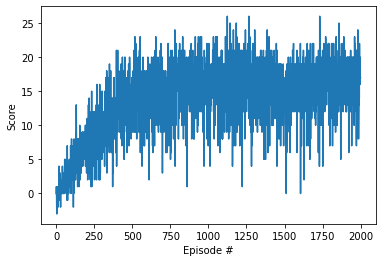

In [8]:
t_step = 0
gamma = 0.99
epsilon = 0.99
agent = Agent(state_size=37, 
              action_size=4,
              t_step=t_step,
              gamma=gamma,
              seed=0)


scores = dqn(agent, 
             env, 
             brain_name, 
             n_episodes=2000, 
             max_t=1000, 
             eps_start=1.0, 
             eps_end=0.01, 
             eps_decay=0.995)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

# Conclusion

As shown in this project, the vanilla DQN architecture has shown to outperform the architectures with improvements, yet all of them were able to solve the environment. I am not sure why this is the case, though I suspect the fault lies either on the implementation, or on the setting of hyperparameters. 

The prioritized experience replay was the worse upgrade, because it had a huge impact on the training performance. In the next session we will discuss improvements for it.

Since time is of essence, and all algorithms have solved the environment, I am not spending more time investigating and tyring to improve it right now. Once the course is over, I will come back to this project, read the papers more thoroughly and fine tune the hyperparameters to improve the result.

Also, I intend to implement the remaining three improvements to complete the Rainbow architecture for the DQN. I shall then apply the algorithm to many different Gym and Unity ML-Agents environments, creating a single repository with hyperparameter configuration filies for each env.


## Note on Hyperparameters

In this simple example of the DQN algorithm, there are several model and training hyperparameters:

#### Model:

- Number and types of layers
- Layers width
- Activation layer
- Dropout layer

#### Agent


- buffer_size: Size of the memory
- batch_size: number of memory entries that will be trained at each learn step simultaneously
- gamma: discount rate for multiplying the next state action value when calculating the target
- tau: soft update parameter used when updating the target network with the local network weights
- learning_rate: weights delta multiplier for scaling the update size
- t_step: used to calculate if it's time to updade
- update_every: number of steps before updating (learning)